In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
#Load The Dataset That is on .excel FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/heart.csv')
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Tail() Is Used the Show the first 5 Rows Of the Dataset 
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#Attributes For Each Columns 
data.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#Check The Shape Of The Dataset 
data.shape

(303, 14)

In [ ]:
#Here Check the datatype for each attribute or column 
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#Here Get the information for each attribute of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

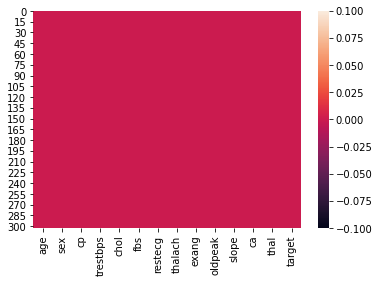

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index([], dtype='object')

In [ ]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['oldpeak'], dtype='object')

In [ ]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#Describe the dataset Column Value 
data[Numerical].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Describe the dataset Column Value 
data[Float].describe()

,oldpeak
count,303.000000
mean,1.039604
std,1.161075
min,0.000000
25%,0.000000
50%,0.800000
75%,1.600000
max,6.200000


In [ ]:
Numerical

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

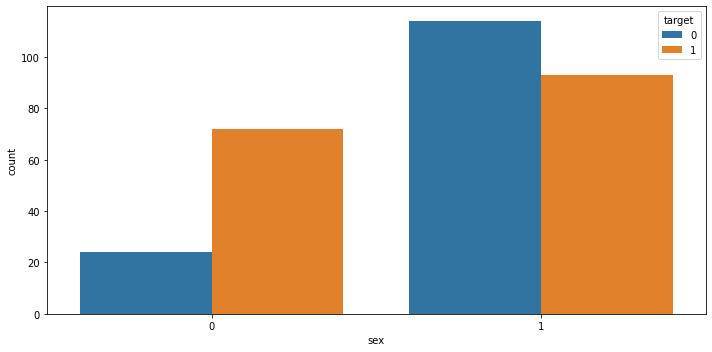

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot('sex', hue='target', data=data)
plt.tight_layout()
plt.show()

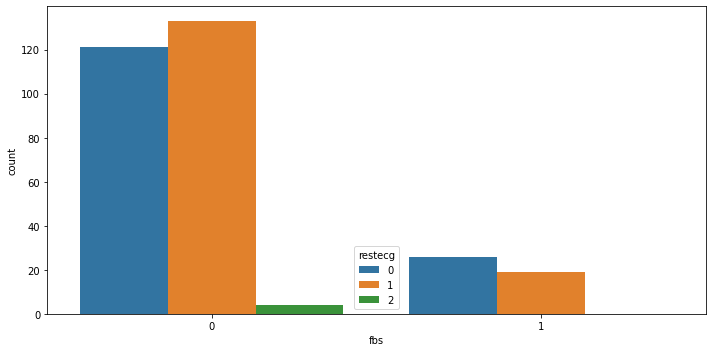

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot('fbs', hue='restecg', data=data)
plt.tight_layout()
plt.show()

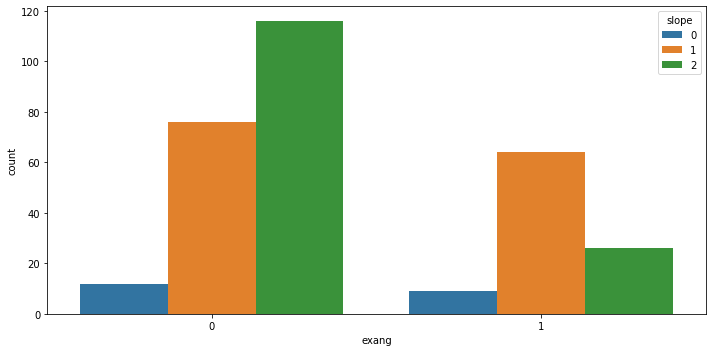

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot('exang', hue='slope', data=data)
plt.tight_layout()
plt.show()

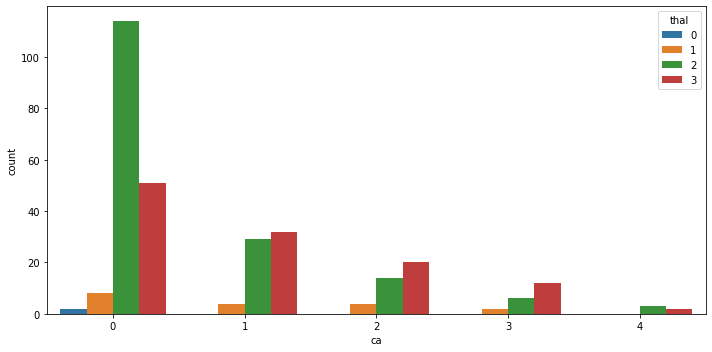

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot('ca', hue='thal', data=data)
plt.tight_layout()
plt.show()

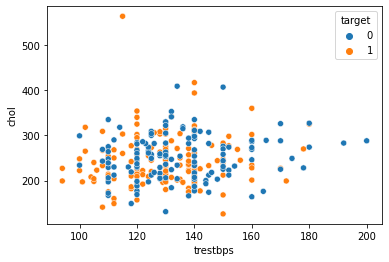

In [ ]:
sns.scatterplot(x='trestbps',y='chol',hue='target',data=data)

In [ ]:
data.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

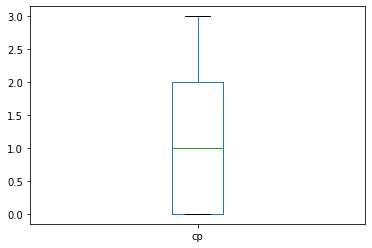

In [ ]:
data['cp'].plot.box()

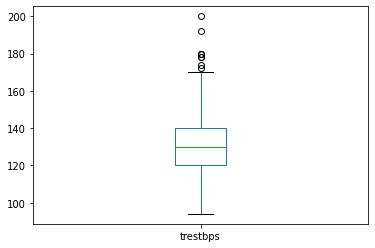

In [ ]:
data['trestbps'].plot.box()

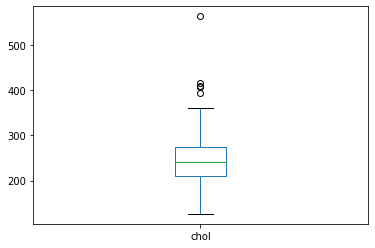

In [ ]:
data['chol'].plot.box()

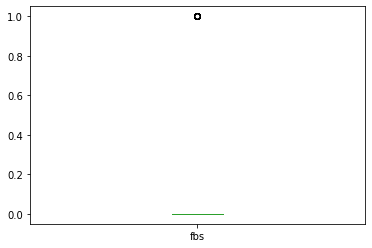

In [ ]:
data['fbs'].plot.box()

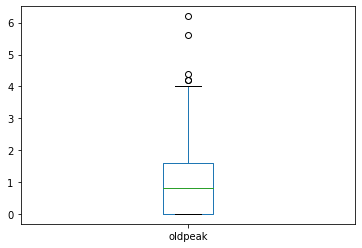

In [ ]:
data['oldpeak'].plot.box()

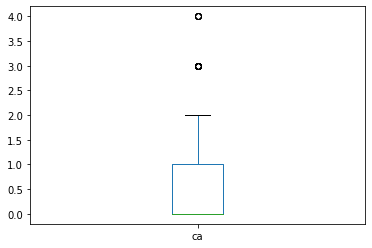

In [ ]:
data['ca'].plot.box()

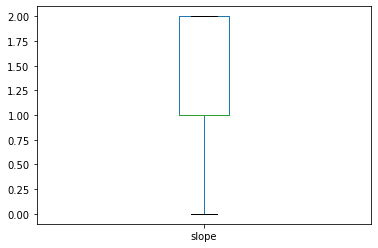

In [ ]:
data['slope'].plot.box()

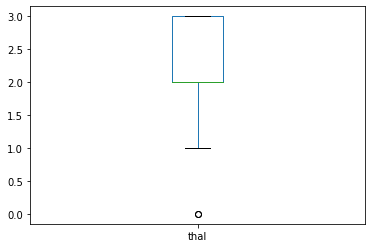

In [ ]:
data['thal'].plot.box()

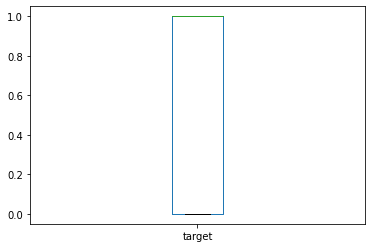

In [ ]:
data['target'].plot.box()

In [ ]:
from scipy import stats #Z-Score used to remove the Outliers 
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [ ]:
threshold = 3 #Set the threshold Values 
print(np.where(z > 3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


In [ ]:
data.shape

(303, 14)

In [ ]:
data= data[(z < 3).all(axis=1)]

In [ ]:
data.shape

(287, 14)

In [ ]:
data.skew()

age        -0.193278
sex        -0.827008
cp          0.480055
trestbps    0.599338
chol        0.520646
fbs         2.029240
restecg     0.151816
thalach    -0.553965
exang       0.759727
oldpeak     1.014363
slope      -0.498881
ca          1.321264
thal       -0.193386
target     -0.197221
dtype: float64

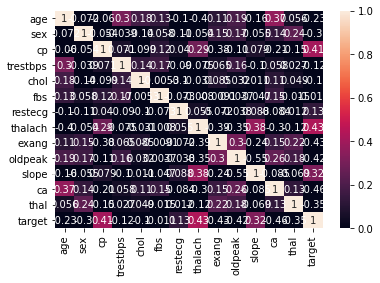

In [ ]:
sns.heatmap(data.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
x=data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',]].copy()

In [ ]:
x.shape

(287, 13)

In [ ]:
y=data['target']

In [ ]:
y.shape

(287,)

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection=selection.fit(x, y)

In [ ]:
print(selection.feature_importances_)

[0.05798316 0.04063244 0.16659398 0.04241107 0.05753498 0.01540505
 0.03027706 0.05323805 0.0730901  0.08036737 0.06352301 0.17382956
 0.14511417]


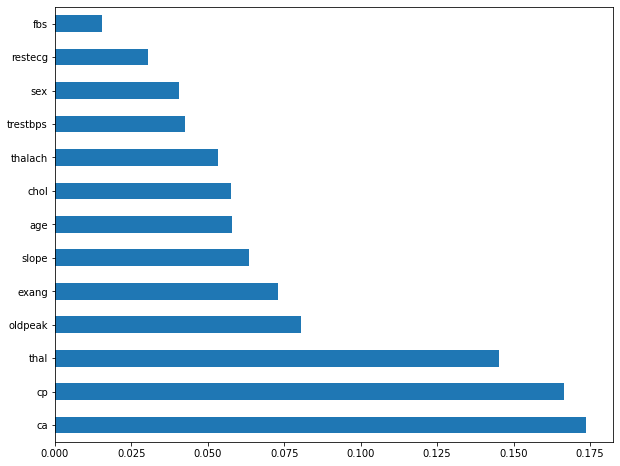

In [ ]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(selection, prefit=True)
x = selector.transform(x)

In [ ]:
y=y.values.reshape(-1,1)

In [ ]:
y.shape

(287, 1)

In [ ]:
x.shape

(287, 4)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=33,random_state=42)

In [ ]:
x_train.shape

(33, 4)

In [ ]:
x_test.shape

(254, 4)

In [ ]:
y_train.shape

(33, 1)

In [ ]:
y_test.shape

(254, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred=lr.predict(x_test)#Pred
print(' prediction \n',pred)#Print Prediction Value 
lr=print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
accuracy score
 0.7913385826771654
confusion metrix
 [[ 76  16]
 [ 37 125]]
classification Report 
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        92
           1       0.89      0.77      0.83       162

    accuracy                           0.79       254
   macro avg       0.78      0.80      0.78       254
weighted avg       0.81      0.79      0.79       254



In [ ]:
from sklearn.naive_bayes import GaussianNB 
gn=GaussianNB()
gn.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred=gn.predict(x_test)
print(' prediction \n',pred)
print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0]
accuracy score
 0.7795275590551181
confusion metrix
 [[ 77  20]
 [ 36 121]]
classification Report 
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        97
           1       0.86      0.77      0.81       157

    accuracy                           0.78       254
   macro avg       0.77      0.78      0.77       254
weighted avg       0.79      0.78      0.78       254



In [ ]:
from sklearn.neighbors import KNeighborsClassifier#KNN ALgorithem to learn the model for prediction 
knc = KNeighborsClassifier(n_neighbors=20)
knc.fit(x_train, y_train)#Fit the model 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
pred=knc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
knc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
accuracy score
 0.7244094488188977
confusion metrix
 [[ 48   5]
 [ 65 136]]
classification Report 
               precision    recall  f1-score   support

           0       0.42      0.91      0.58        53
           1       0.96      0.68      0.80       201

    accuracy                           0.72       254
   macro avg       0.69      0.79      0.69       254
weighted avg       0.85      0.72      0.75       254



In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred=svc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
svc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0]
accuracy score
 0.7795275590551181
confusion metrix
 [[ 75  18]
 [ 38 123]]
classification Report 
               precision    recall  f1-score   support

           0       0.66      0.81      0.73        93
           1       0.87      0.76      0.81       161

    accuracy                           0.78       254
   macro avg       0.77      0.79      0.77       254
weighted avg       0.80      0.78      0.78       254



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred=tree.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
tree=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0
 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1
 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0]
accuracy score
 0.7007874015748031
confusion metrix
 [[90 53]
 [23 88]]
classification Report 
               precision    recall  f1-score   support

           0       0.80      0.63      0.70       143
           1       0.62      0.79      0.70       111

    accuracy                           0.70       254
   macro avg       0.71      0.71      0.70       254
weighted avg       0.72      0.70      0.70       254



In [ ]:
from sklearn.ensemble import RandomForestClassifier
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=14, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred=b.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
b=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0]
accuracy score
 0.7834645669291339
confusion metrix
 [[ 88  30]
 [ 25 111]]
classification Report 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       118
           1       0.79      0.82      0.80       136

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



In [ ]:
from sklearn.externals import joblib
joblib.dump(Hd,'heartdisease.pkl')

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['heartdisease.pkl']